<a href="https://colab.research.google.com/github/jongchurlwon/github_test/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 36.0 MB/s 


In [3]:
import pyupbit

In [19]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ETH", interval="minute60")
df

,open,high,low,close,volume,value
2021-07-22 17:00:00,2352000.0,2386000.0,2349000.0,2372000.0,5005.511527,1.186920e+10
2021-07-22 18:00:00,2371000.0,2374000.0,2319000.0,2343000.0,6954.286941,1.630471e+10
2021-07-22 19:00:00,2341000.0,2351000.0,2331000.0,2339000.0,2775.221830,6.495505e+09
2021-07-22 20:00:00,2338000.0,2345000.0,2325000.0,2339000.0,2702.324229,6.310859e+09
2021-07-22 21:00:00,2339000.0,2369000.0,2305000.0,2366000.0,5972.233797,1.395939e+10
...,...,...,...,...,...,...
2021-07-30 20:00:00,2733000.0,2734000.0,2696000.0,2699000.0,3374.772060,9.165361e+09
2021-07-30 21:00:00,2699000.0,2719000.0,2696000.0,2707000.0,2575.783822,6.975693e+09
2021-07-30 22:00:00,2706000.0,2725000.0,2697000.0,2713000.0,3559.870699,9.658838e+09
2021-07-30 23:00:00,2712000.0,2735000.0,2709000.0,2715000.0,4052.005629,1.103030e+10


In [20]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-07-22 17:00:00,2372000.0
1,2021-07-22 18:00:00,2343000.0
2,2021-07-22 19:00:00,2339000.0
3,2021-07-22 20:00:00,2339000.0
4,2021-07-22 21:00:00,2366000.0
...,...,...
195,2021-07-30 20:00:00,2699000.0
196,2021-07-30 21:00:00,2707000.0
197,2021-07-30 22:00:00,2713000.0
198,2021-07-30 23:00:00,2715000.0


In [21]:
#prophet 불러옴
from fbprophet import Prophet

In [22]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [23]:

#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

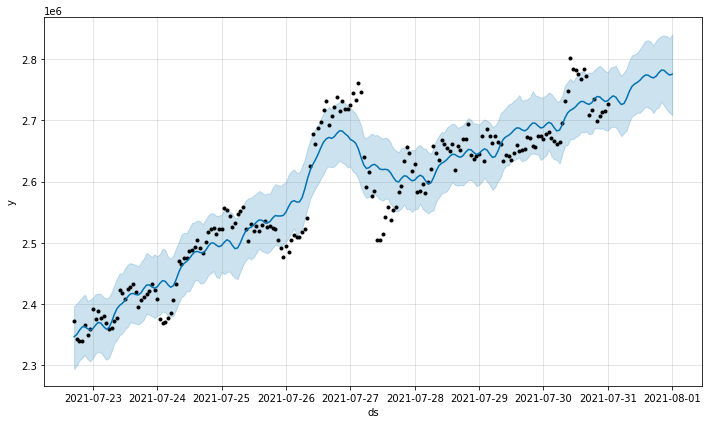

In [24]:
#그래프1
fig1 = model.plot(forecast)


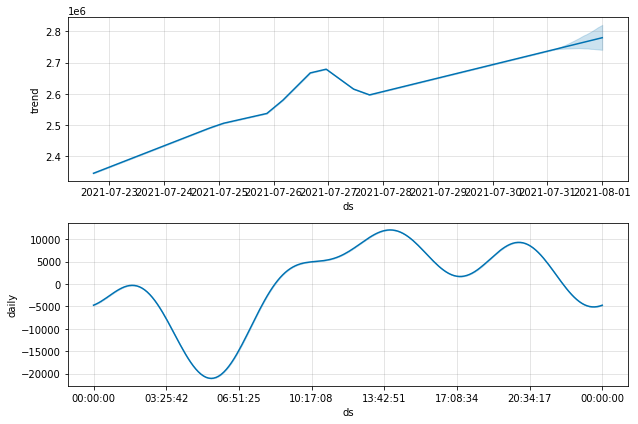

In [25]:
#그래프2
fig2 = model.plot_components(forecast)

In [26]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-ETH")
nowValue

2727000.0

In [27]:

#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

2755170.7701194733

In [28]:

#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  2727000.0
종가의 가격:  2755170.7701194733


In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-22 17:00:00,2.345841e+06,2.295502e+06,2.398580e+06,2.345841e+06,2.345841e+06,1583.095698,1583.095698,1583.095698,1583.095698,1583.095698,1583.095698,0.0,0.0,0.0,2.347424e+06
1,2021-07-22 18:00:00,2.348590e+06,2.292266e+06,2.403721e+06,2.348590e+06,2.348590e+06,2467.362588,2467.362588,2467.362588,2467.362588,2467.362588,2467.362588,0.0,0.0,0.0,2.351058e+06
2,2021-07-22 19:00:00,2.351340e+06,2.303542e+06,2.409572e+06,2.351340e+06,2.351340e+06,6466.573460,6466.573460,6466.573460,6466.573460,6466.573460,6466.573460,0.0,0.0,0.0,2.357806e+06
3,2021-07-22 20:00:00,2.354089e+06,2.309335e+06,2.416257e+06,2.354089e+06,2.354089e+06,9125.263119,9125.263119,9125.263119,9125.263119,9125.263119,9125.263119,0.0,0.0,0.0,2.363214e+06
4,2021-07-22 21:00:00,2.356838e+06,2.309114e+06,2.419158e+06,2.356838e+06,2.356838e+06,7029.381177,7029.381177,7029.381177,7029.381177,7029.381177,7029.381177,0.0,0.0,0.0,2.363868e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-07-31 20:00:00,2.771943e+06,2.726862e+06,2.835109e+06,2.750562e+06,2.789980e+06,9125.263119,9125.263119,9125.263119,9125.263119,9125.263119,9125.263119,0.0,0.0,0.0,2.781068e+06
220,2021-07-31 21:00:00,2.773740e+06,2.721627e+06,2.836653e+06,2.750725e+06,2.793150e+06,7029.381178,7029.381178,7029.381178,7029.381178,7029.381178,7029.381178,0.0,0.0,0.0,2.780769e+06
221,2021-07-31 22:00:00,2.775537e+06,2.719324e+06,2.839881e+06,2.750694e+06,2.795855e+06,1244.616855,1244.616855,1244.616855,1244.616855,1244.616855,1244.616855,0.0,0.0,0.0,2.776782e+06
222,2021-07-31 23:00:00,2.777334e+06,2.711640e+06,2.832564e+06,2.750966e+06,2.799937e+06,-3635.024181,-3635.024181,-3635.024181,-3635.024181,-3635.024181,-3635.024181,0.0,0.0,0.0,2.773699e+06
